In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)

ride_data_df = pd.read_csv(ride_data_to_load)


city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [2]:
ride_data_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [3]:
# Combine the data into a single dataset
combined_df = pd.merge(ride_data_df, city_data_df, on="city")
# Display the data table for preview
combined_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [4]:
combined_df.dtypes

city             object
date             object
fare            float64
ride_id           int64
driver_count      int64
type             object
dtype: object

In [5]:
combined_df.shape

(2375, 6)

In [6]:
average_fare = combined_df.groupby("city")["fare"].mean()
average_fare.head()

city
Amandaburgh      24.641667
Barajasview      25.332273
Barronchester    36.422500
Bethanyland      32.956111
Bradshawfurt     40.064000
Name: fare, dtype: float64

In [9]:
city_rides = combined_df.groupby("city")["ride_id"].count()
city_rides.head()

city
Amandaburgh      18
Barajasview      22
Barronchester    16
Bethanyland      18
Bradshawfurt     10
Name: ride_id, dtype: int64

In [10]:
city_drivers = combined_df.groupby("city")["driver_count"].count()
city_drivers.head()

city
Amandaburgh      18
Barajasview      22
Barronchester    16
Bethanyland      18
Bradshawfurt     10
Name: driver_count, dtype: int64

In [11]:
city_group = combined_df.groupby(["type", "city", "driver_count"])
city_group.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban
24,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
25,South Michelleport,2018-03-02 09:54:50,33.12,813844006721,72,Urban
26,South Michelleport,2018-01-08 09:38:14,23.77,4916160406018,72,Urban
27,South Michelleport,2018-04-22 03:15:33,43.62,4663606096929,72,Urban
28,South Michelleport,2018-03-03 16:13:34,41.62,2339775503972,72,Urban


In [30]:
#What does this nunique look for?
combined_df.nunique()

city             120
date            2375
fare            1841
ride_id         2375
driver_count      52
type               3
dtype: int64

In [31]:
ride_count = combined_df["ride_id"].count()
ride_count

2375

In [32]:
total_fare = combined_df["fare"].sum()
total_fare

63538.64

In [33]:
driver_count = combined_df["driver_count"].sum()
driver_count

68709

## Bubble Plot of Ride Sharing Data

In [21]:
rsd_df = city_group['fare'].mean()
rsd_df = pd.DataFrame(rsd_df)
rsd_df['ride_count'] = pd.DataFrame(city_group['ride_id'].count())
rsd_df = rsd_df.rename(columns={'fare':'Avg Fare'})
rsd_df.head()
# Obtain the x and y coordinates for each of the three city types

# Build the scatter plots for each city types

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure


Avg Fare  ride_count
type  city           driver_count                       
Rural Bradshawfurt   7             40.064000          10
      Garzaport      7             24.123333           3
      Harringtonfort 4             33.470000           6
      Jessicaport    1             36.013333           6
      Lake Jamie     4             34.358333           6

In [18]:
rev_rsd_df.head()

driver_count  Rides       fare
type  city                                          
Rural Bradshawfurt               7     10  40.064000
      Garzaport                  7      3  24.123333
      Harringtonfort             4      6  33.470000
      Jessicaport                1      6  36.013333
      Lake Jamie                 4      6  34.358333

In [ ]:
# Show plot
plt.show()

In [39]:
colors = ["lightcoral", "lightskyblue", "gold"]
explode = (0, .1, 0)

## Total Fares by City Type

In [40]:
# Calculate Type Percents

# Calculate Ride Percents
ride_fare_df = pd.DataFrame(combined_df)
ride_fare_group = ride_fare_df.groupby(["type"])
ride_fare_breakdown = pd.DataFrame({"Total Spend":ride_fare_group["fare"].sum(),"Percentage of Total Spend":ride_fare_group["fare"].sum()/total_fare*100})

ride_fare_breakdown.head()


,Total Spend,Percentage of Total Spend
type,,
Rural,4327.93,6.811493
Suburban,19356.33,30.463872
Urban,39854.38,62.724635


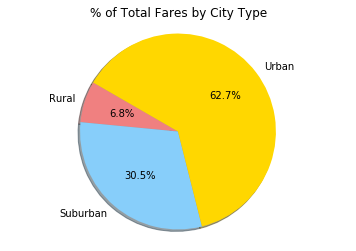

<Figure size 432x288 with 0 Axes>

In [41]:
# Build Pie Chart
plt.pie(ride_fare_breakdown["Percentage of Total Spend"], labels = ride_type_breakdown.index, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")

plt.title("% of Total Fares by City Type")

plt.show()
# Save Figure
plt.savefig("data/Pyber_TotFare_CityType.png")

## Total Rides by City Type

In [42]:
# Calculate Ride Percents
ride_type_df = pd.DataFrame(combined_df)
ride_type_group = ride_type_df.groupby(["type"])
ride_type_breakdown = pd.DataFrame({"Total Count":ride_type_group["type"].count(),"Percentage of Total Rides":ride_type_group["type"].count()/ride_count*100})

ride_type_breakdown.head()

,Total Count,Percentage of Total Rides
type,,
Rural,125,5.263158
Suburban,625,26.315789
Urban,1625,68.421053


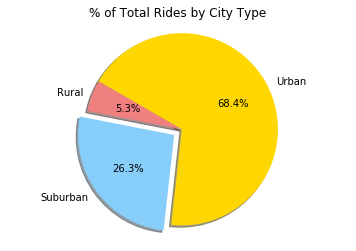

<Figure size 432x288 with 0 Axes>

In [43]:
# Build Pie Chart
plt.pie(ride_type_breakdown["Percentage of Total Rides"], labels = ride_type_breakdown.index, explode=explode, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")

plt.title("% of Total Rides by City Type")

plt.show()
# Save Figure
plt.savefig("data/Pyber_TotRides_CityType.png")

In [44]:
# Show Figure
plt.show()

## Total Drivers by City Type

In [45]:
# Calculate Driver Percents
driver_count_group = city_data_df.groupby(["type"])
driver_count_breakdown = pd.DataFrame({"Total Count":driver_count_group["driver_count"].sum()})#,"Percentage of Total Drivers":driver_count_group["driver_count"].sum()/driver_count*100})

driver_count_breakdown.head()


,Total Count
type,
Rural,78
Suburban,490
Urban,2405


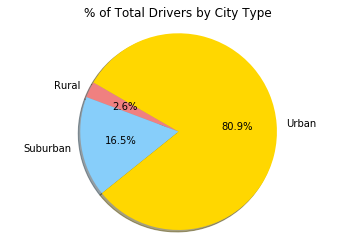

<Figure size 432x288 with 0 Axes>

In [46]:
# Build Pie Chart
plt.pie(driver_count_breakdown, labels = driver_count_breakdown.index, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")

plt.title("% of Total Drivers by City Type")

plt.show()
# Save Figure
plt.savefig("data/Pyber_Drivers_CityType.png")

In [ ]:
# Show Figure
plt.show()